In [7]:
import cv2
import numpy as np
from PIL import Image as im
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [8]:
def extract_plate(img): 
    plate_img = img.copy()
    plate_cascade = cv2.CascadeClassifier('./indian_license_plate.xml')
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.3, minNeighbors = 7)
    for (x,y,w,h) in plate_rect:
        a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1])) 
        plate = plate_img[y+a:y+h-a, x+b:x+w-b, :]
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (51,51,255), 3)        
    return plate_img, plate 

In [9]:
import numpy as np
import cv2

def find_contours(dimensions, img) :

    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) 

            char_copy = np.zeros((44,24))
            
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            char = cv2.subtract(255, char)

            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) 

    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])
    img_res = np.array(img_res_copy)

    return img_res


In [15]:
cap = cv.VideoCapture('vid.mp4')
while cap.isOpened():
    ret, frame = cap.read()
   
    if not ret:
        break
    frame = cv2.resize(frame, (960, 540))  
    cv.imshow('frame', frame)
    if cv.waitKey(50) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [14]:
img = cv2.imread("./images/out.jpg", cv2.IMREAD_COLOR)
a,b = extract_plate(img)

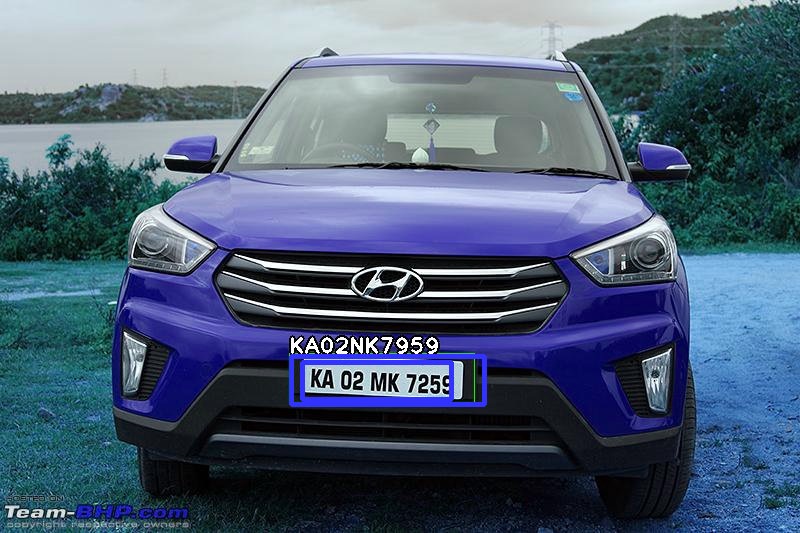

In [15]:
data = im.fromarray(a)
data

In [16]:
data = im.fromarray(b)
data

In [17]:
import pytesseract 
import matplotlib.pyplot as plt
import glob
import os
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [18]:
pytesseract.image_to_string(data, lang ='eng')[:-1]

'KA 02 MK 7259'